In [1]:
# Imports
from astropy.time import Time
from astropy.coordinates import AltAz, Angle, EarthLocation, ICRS, SkyCoord
from astropy import units as u
import numpy as np
from scipy.optimize import minimize_scalar

# Matplotlib settings
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8.0)
matplotlib.rcParams['xtick.labelsize'] = 24.0
matplotlib.rcParams['ytick.labelsize'] = 24.0
matplotlib.rcParams['axes.titlesize'] = 27.0
matplotlib.rcParams['axes.labelsize'] = 27.0
matplotlib.rcParams['legend.fontsize'] = 24.0
matplotlib.rcParams['font.serif'] = ['Computer Modern', 'Times New Roman']
matplotlib.rcParams['font.family'] = ['serif', 'STIXGeneral']
matplotlib.rcParams['legend.frameon'] = True
import matplotlib.pyplot as plt

# Input: time, ra, dec
As an example, use the time and location of GRB 221009A

In [2]:
# UTC time of detection
obstime = Time({'year': 2022, 'month': 10, 'day': 9,
    'hour': 13, 'minute': 16, 'second': 59.0}, scale='utc')

# Location of astrophysical source
ra = 288.2652 * u.deg
dec = 19.7735 * u.deg

# Output: optimal latitude and longitude
Approximately where on Earth do you need to stand (lat, lon) for GRB 221009A to be directly overhead?

We know from physical intuition that the latitude should equal the declination, so we only need to solve for longitude.

In [3]:
# Set latitude equal to declination
opt_lat = dec.value

In [5]:
# Find optimal longitude

def get_zenith(lon, lat, ra, dec, obstime=obstime):
    """
    Record the zenith angle at a given latitude and longitude,
    given a right ascension, declination, and UTC time
    """
    
    # Convert to EarthLocation object, assumign height equivalent to WGS84 ellipsoid
    # Returns loc, which is x,y,z in meters as geocentric coordinates
    loc = EarthLocation.from_geodetic(lat=lat, lon=lon)
    
    # Convert sky location into SkyCoord object
    sky = SkyCoord(frame=ICRS, ra=ra, dec=dec, 
        obstime=obstime, location=loc)
    
    # Convert to altitude and azimuthal angles
    altaz = sky.transform_to(AltAz)
    
    # Report zenith angle
    return altaz.zen.degree


opt_lon = minimize_scalar(get_zenith, args=(opt_lat, ra, dec)).x


In [6]:
# Print out optimal coordinates
def label_lat_lon(lat, lon):
    """
    String formatter for latitude and longitude
    """
    if lat >= 0:
        label = f'{lat:.2f}N,'
    else:
        label = f'{lat:.2f}S'
    if lon > 180:
        label += f' {360 - lon:.2f}W'
    else:
        label += f' {lon:.2f}E'
    
    return label


print(f'Optimal Location: {label_lat_lon(opt_lat, opt_lon)}')

Optimal Location: 19.77N, 71.13E


# Data visualization
Make a nice plot of zenith angle across the Earth

In [13]:
# Compute zenith angles over entire Earth
lon_arr = np.linspace(0, 360, 100)
lat_arr = np.linspace(-90, 90, 100)

# Set up coordinate grid
X, Y = np.meshgrid(lon_arr, lat_arr)
Z = np.zeros_like(X)

# Compute zenith angles for each latitude and longitude
for lat_idx, lat in enumerate(lat_arr):
    Z[lat_idx] = get_zenith(lon_arr, lat, ra, dec)
    

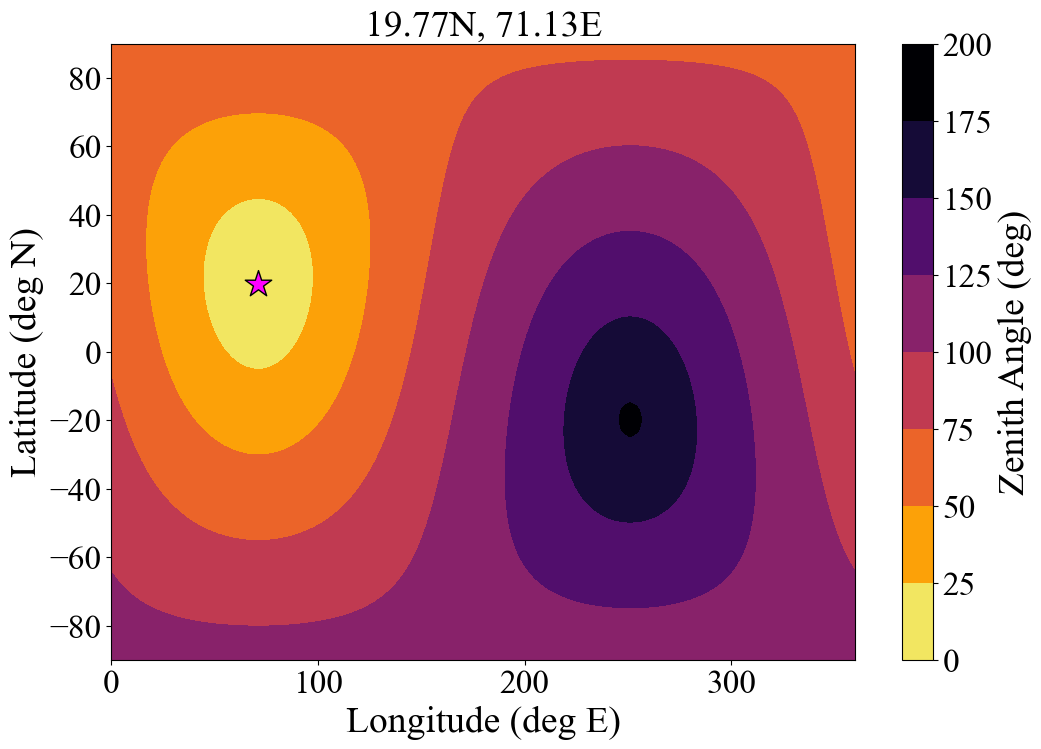

In [17]:
# 2D plot
fig, ax = plt.subplots()
contour = ax.contourf(X, Y, Z, cmap='inferno_r', vmin=0, vmax=180)

# Plot optimal point
ax.scatter(opt_lon, opt_lat, color='magenta', edgecolor='k',
    marker='*', s=400, zorder=10)

# Labels
ax.set_xlabel('Longitude (deg E)')
ax.set_ylabel('Latitude (deg N)')
ax.set_title(label_lat_lon(opt_lat, opt_lon))
plt.colorbar(contour, label='Zenith Angle (deg)')

plt.show()

